In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [2]:
df = pd.read_excel("electric_power_data.xlsx")

In [3]:
#convert to date
df["datetime"] = pd.to_datetime(df["datetime"])

In [4]:
df["hour"] = df["datetime"].dt.hour
df["minute"] = df["datetime"].dt.minute
df["day"] = df["datetime"].dt.day
df["month"] = df["datetime"].dt.month
df["weekday"] = df["datetime"].dt.weekday
df["is_weekend"] = df["weekday"].isin([5, 6]).astype(int)

In [5]:
def part_of_day(h):
    if 5 <= h < 12:
        return "morning"
    elif 12 <= h < 17:
        return "afternoon"
    elif 17 <= h < 21:
        return "evening"
    else:
        return "night"

df["part_of_day"] = df["hour"].apply(part_of_day)

In [6]:
target_col = "P(kW)"   # change this if your power column has another name
y = df[target_col]

# Features = everything except target + datetime
X = df.drop(columns=[target_col, "datetime"])

# Convert categorical column to numbers
X = pd.get_dummies(X, drop_first=True)

In [7]:
train_size = int(0.8 * len(df))
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

In [8]:
model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6
)

model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [9]:
pred = model.predict(X_test)

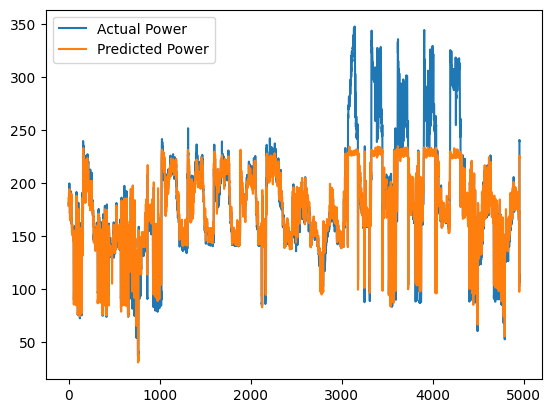

In [10]:
plt.plot(y_test.values, label="Actual Power")
plt.plot(pred, label="Predicted Power")
plt.legend()
plt.show()

In [11]:
#Accuracy

r2 = r2_score(y_test, pred)
print("Model Accuracy (R²):", r2)

Model Accuracy (R²): 0.8048217160958274


In [12]:
output = X_test.copy()
output["Actual_Power"] = y_test.values
output["Predicted_Power"] = pred

output.to_excel("solar_predictions.xlsx", index=False)


In [15]:
from google.colab import files
files.download("solar_predictions.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

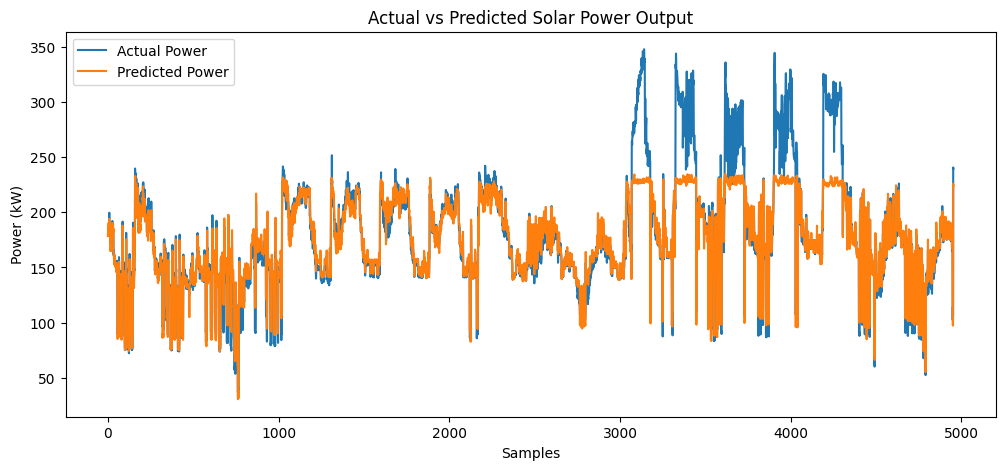

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(output["Actual_Power"].values, label="Actual Power")
plt.plot(output["Predicted_Power"].values, label="Predicted Power")
plt.legend()
plt.title("Actual vs Predicted Solar Power Output")
plt.xlabel("Samples")
plt.ylabel("Power (kW)")
plt.show()
